## Import libraries & Load data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

# Load data
data = pd.read_csv('data/adult.data.csv',header=None)
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

## Lets check the data

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income

In [2]:
# let check information in the CSV file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','native-country']

In [18]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [4]:
# Checking for null columns
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


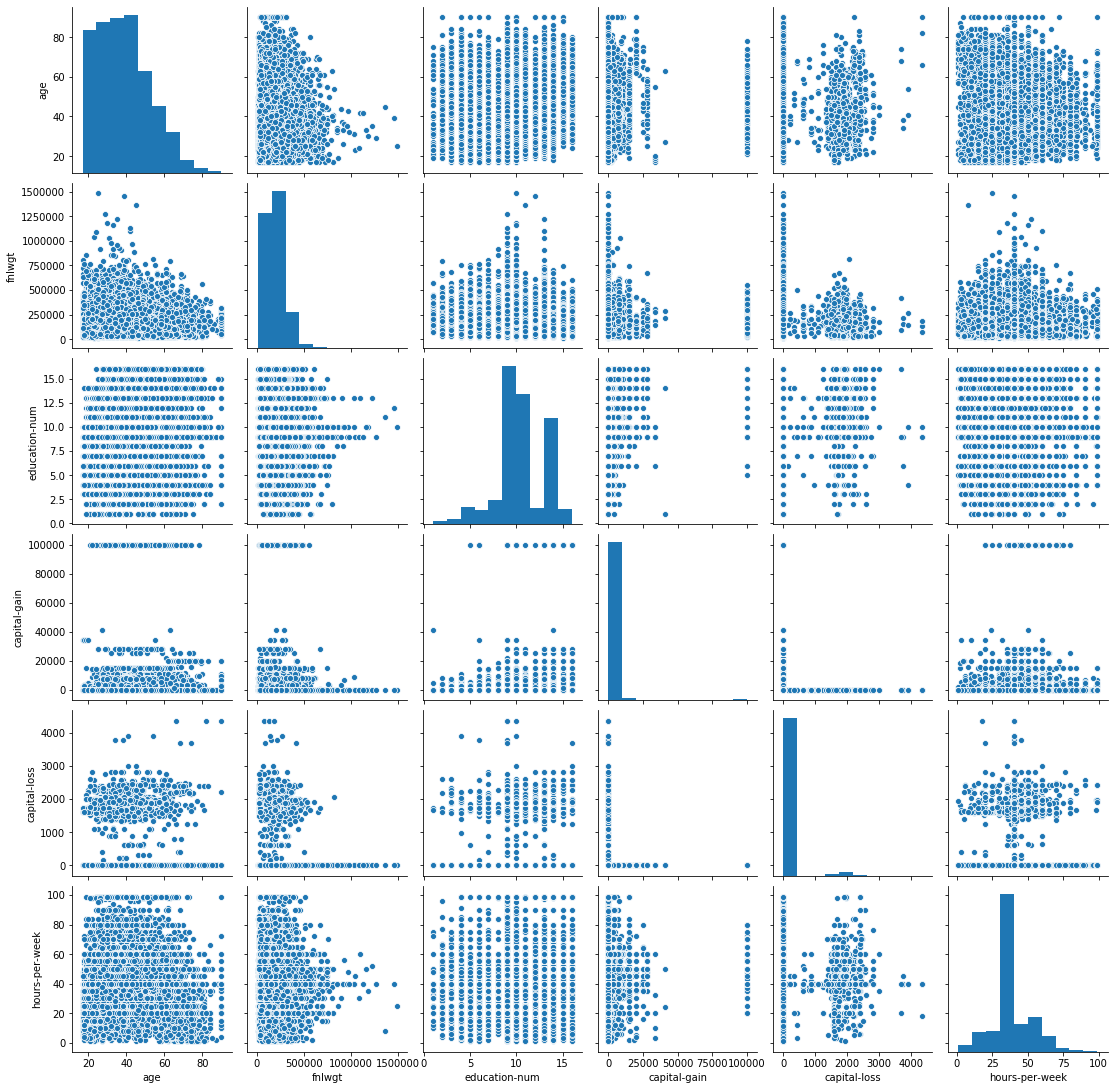

In [6]:
# Lets see types of relationships across the entire data set
sns.pairplot(data)

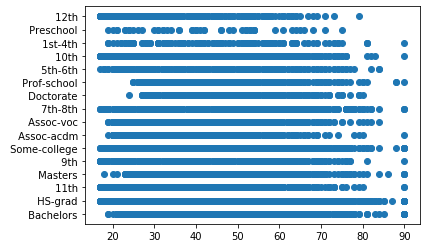

In [8]:
plt.scatter(data['age'], data['education'])

In [13]:
data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [11]:
data.groupby('age').count()

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,,,,,,,,,,,,,,
17,395,395,395,395,395,395,395,395,395,395,395,395,395,395
18,550,550,550,550,550,550,550,550,550,550,550,550,550,550
19,712,712,712,712,712,712,712,712,712,712,712,712,712,712
20,753,753,753,753,753,753,753,753,753,753,753,753,753,753
21,720,720,720,720,720,720,720,720,720,720,720,720,720,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,3,3,3,3,3,3,3,3,3,3,3,3,3,3
86,1,1,1,1,1,1,1,1,1,1,1,1,1,1
87,1,1,1,1,1,1,1,1,1,1,1,1,1,1


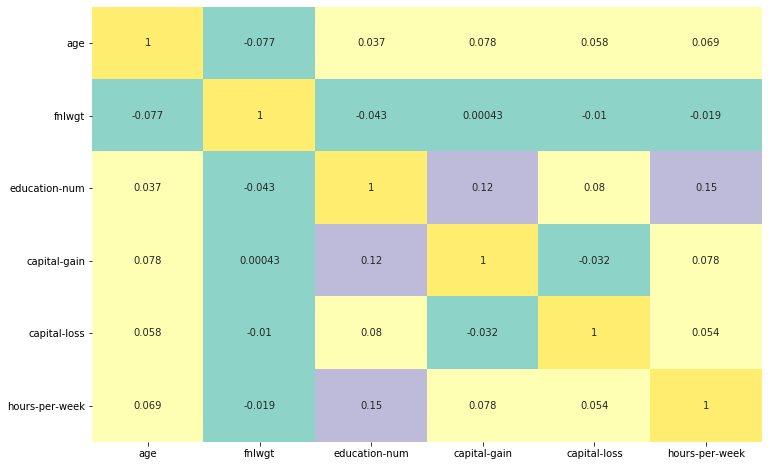

In [16]:
#Correlation between features
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cbar=False, cmap = 'Set3')
plt.show()

In [21]:
# data distribution analysys
variables = ['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','native-country']
for v in variables:
    print(v)
    data1 = data.sort_values(by=[v])
    d = data[v].value_counts()
    print(d)

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
education-num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
1

Data distribution analysis


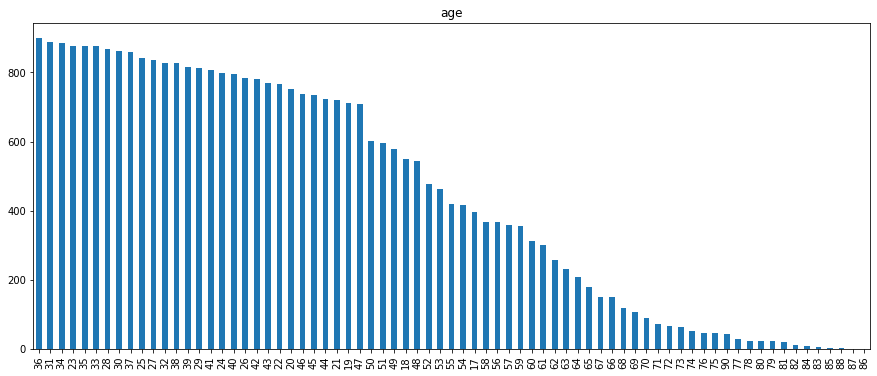

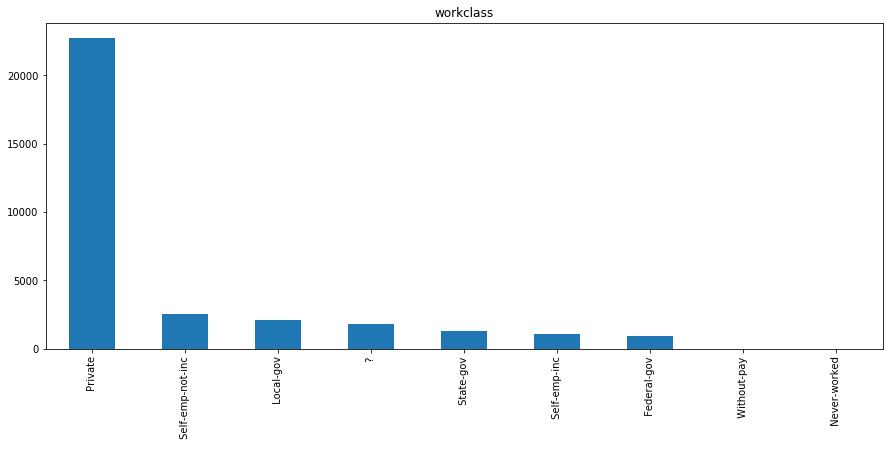

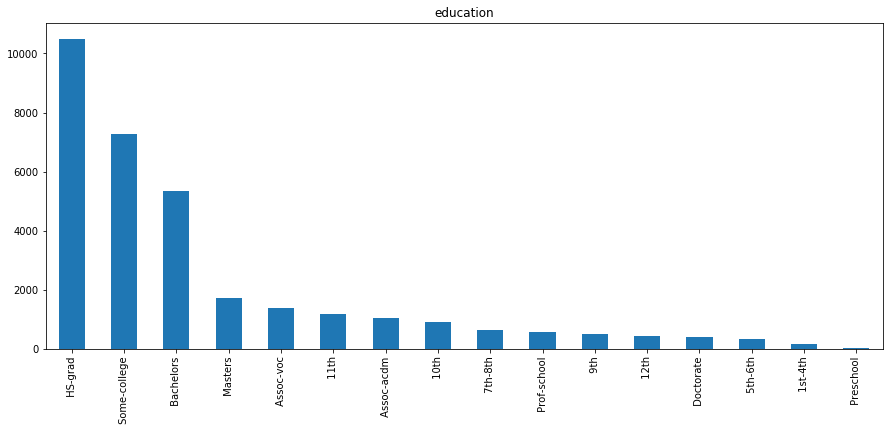

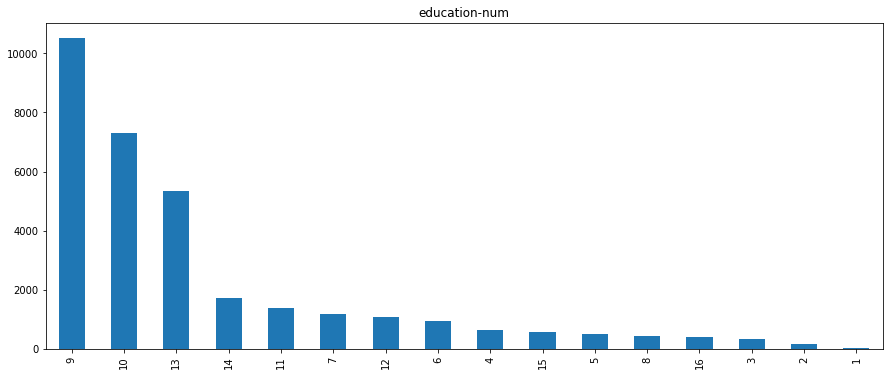

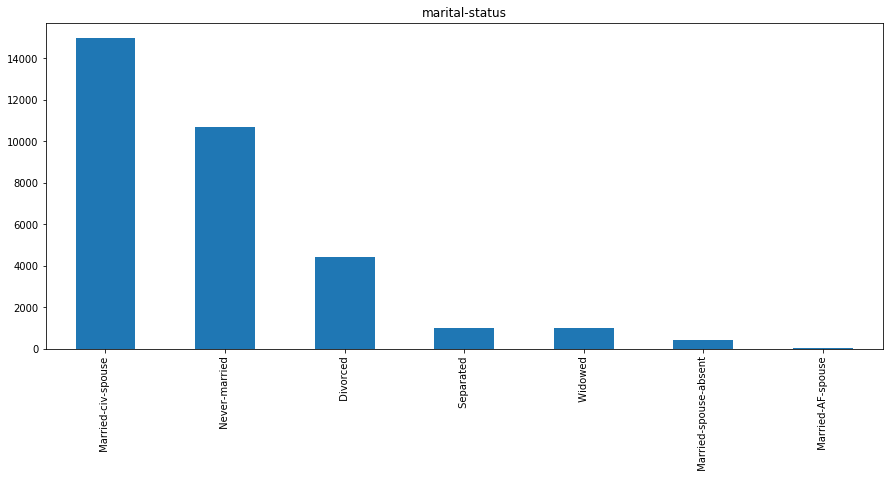

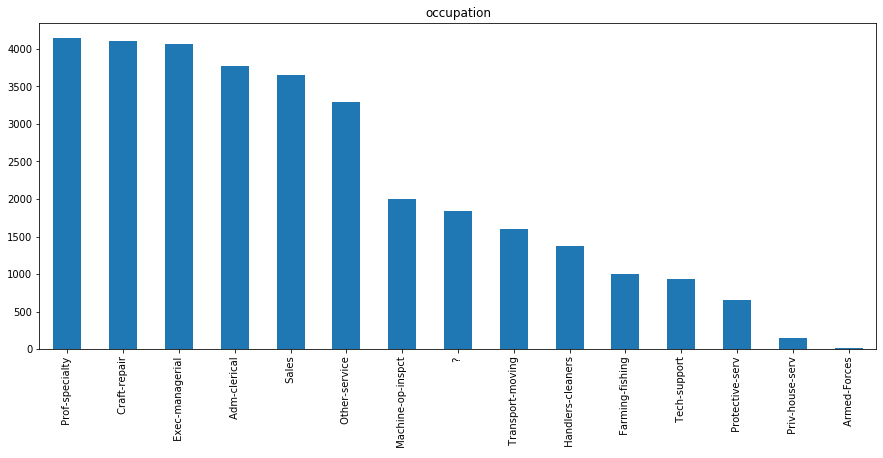

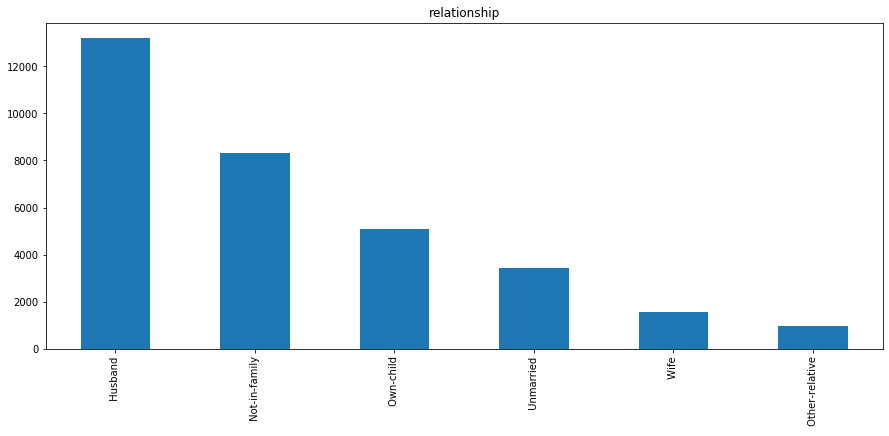

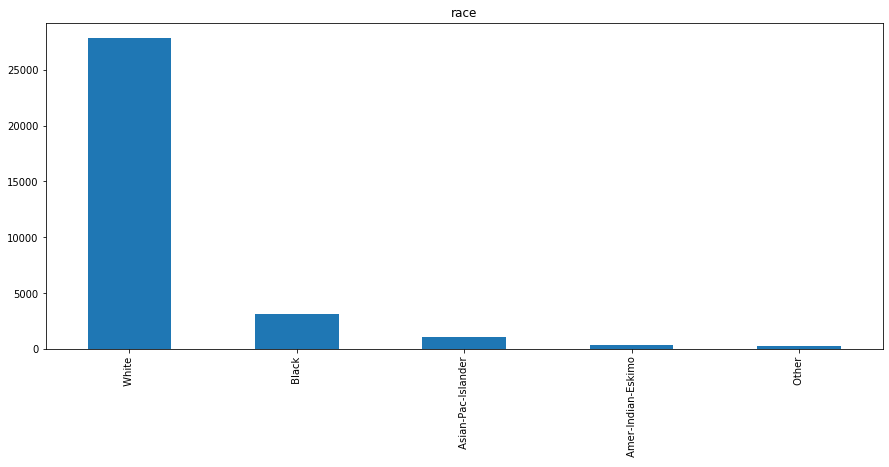

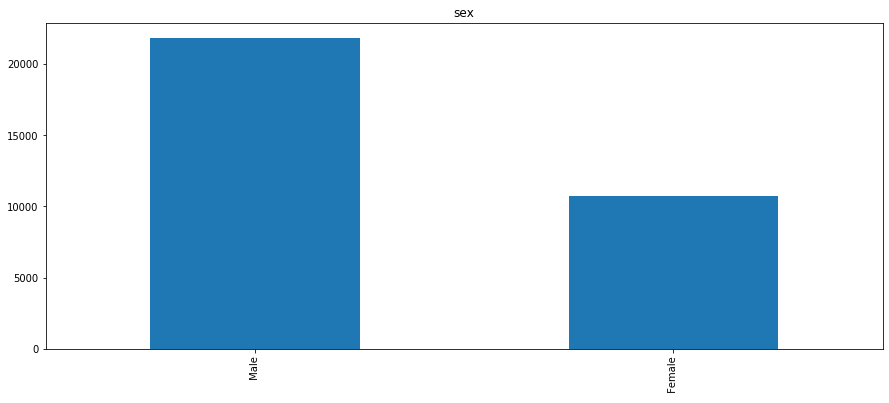

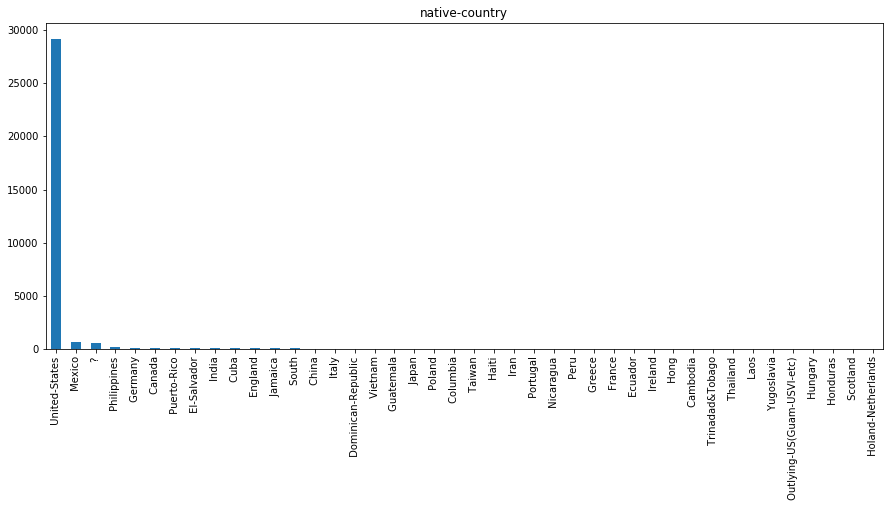

In [25]:
print('Data distribution analysis')
for v in variables:
    data1 = data.sort_values(by=[v])
    data[v].value_counts().plot(kind = 'bar', figsize = (15,6))
    plt.title(v)
    plt.show()

In [26]:
data['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [49]:
data_less_50 = data[(data['income'] == " <=50K")]
data_greater_50 = data[(data['income'] == " >50K")]

Data distribution analysis for income less than 50


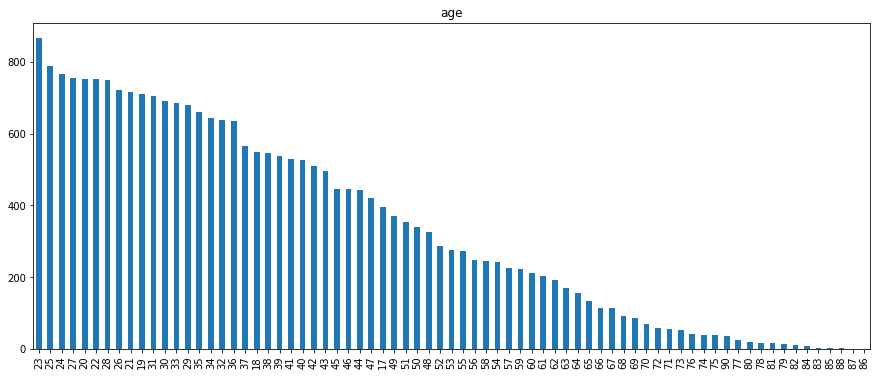

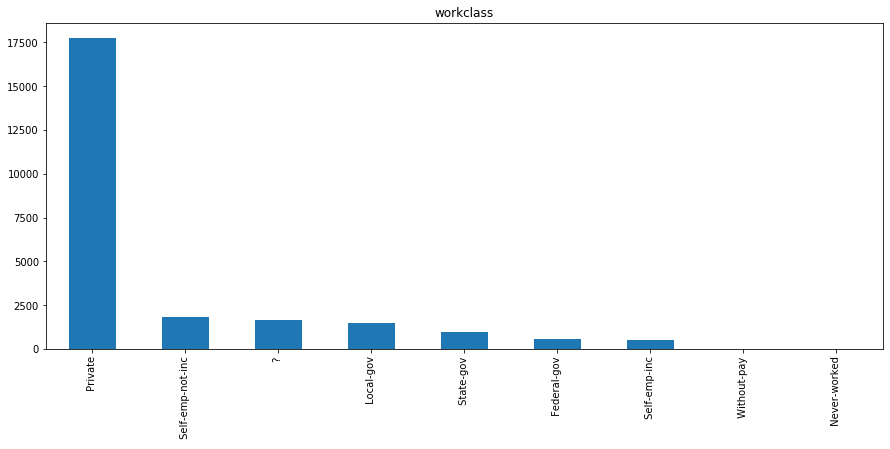

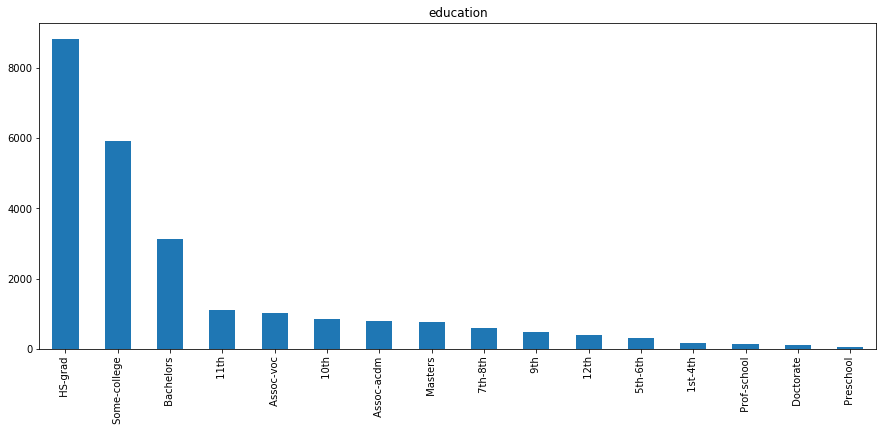

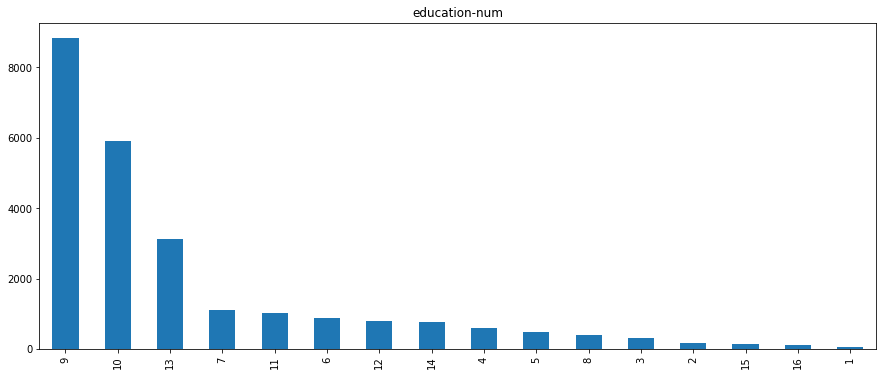

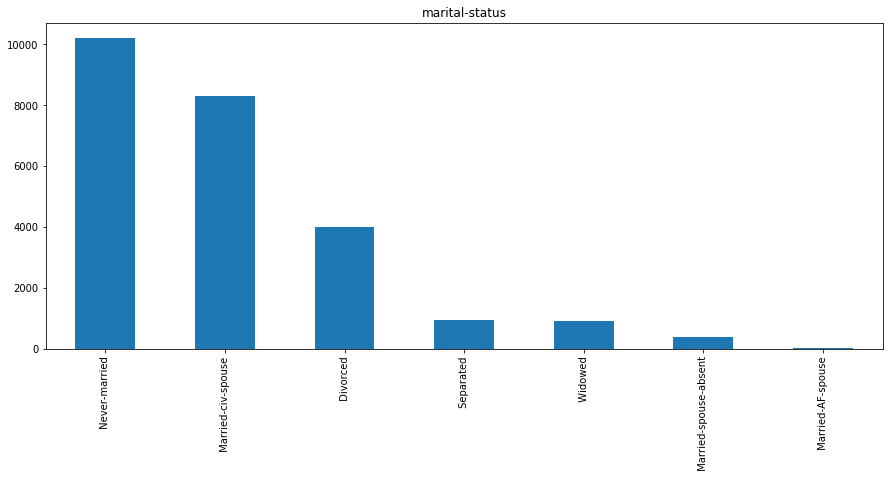

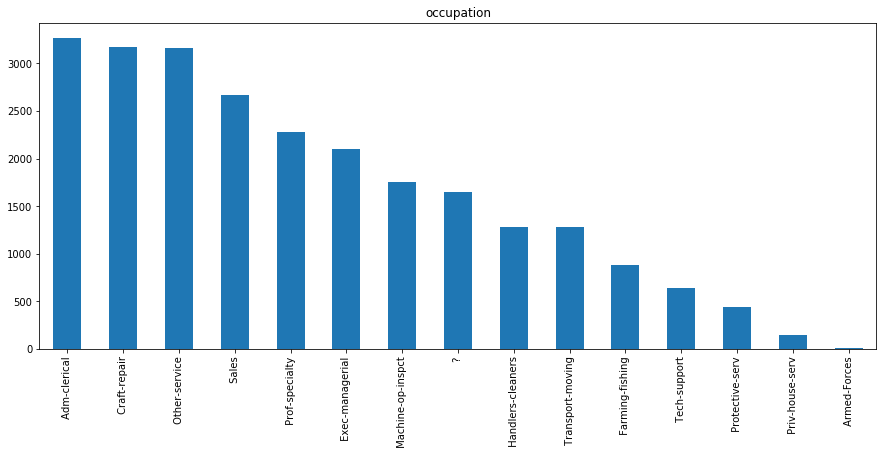

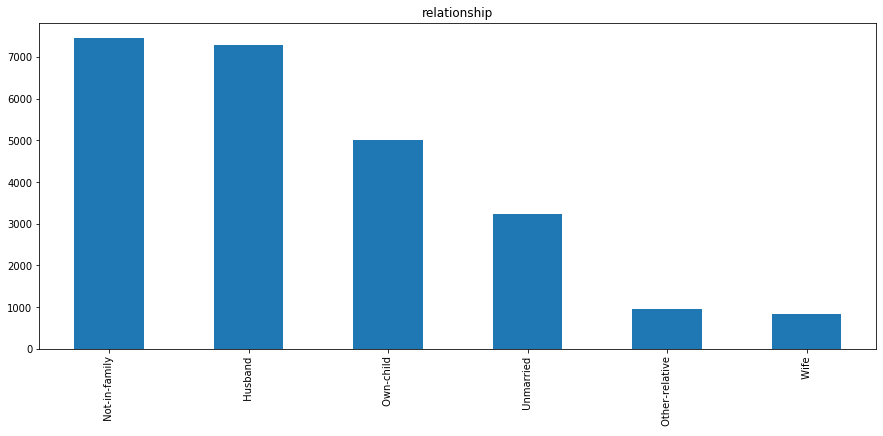

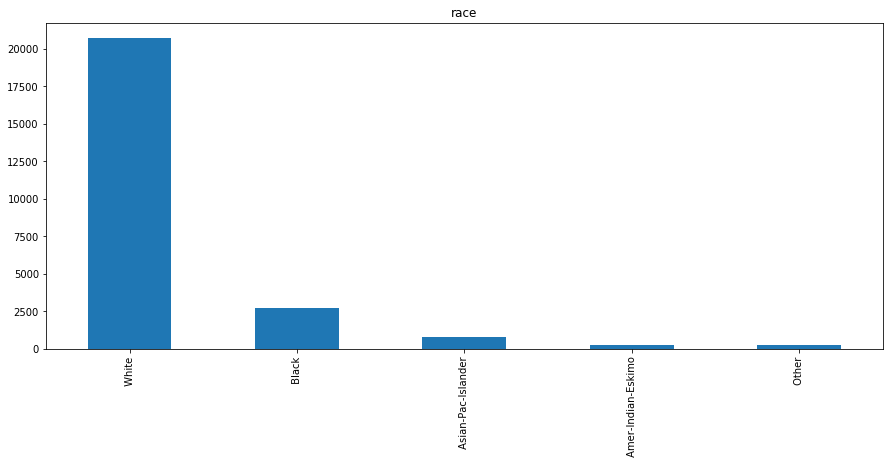

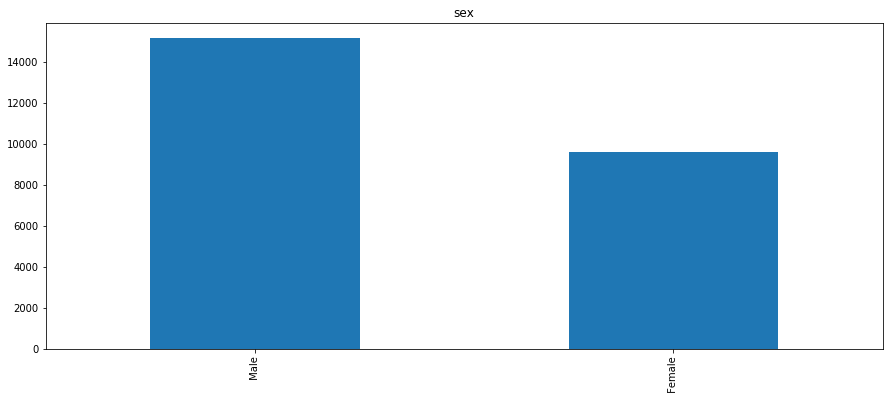

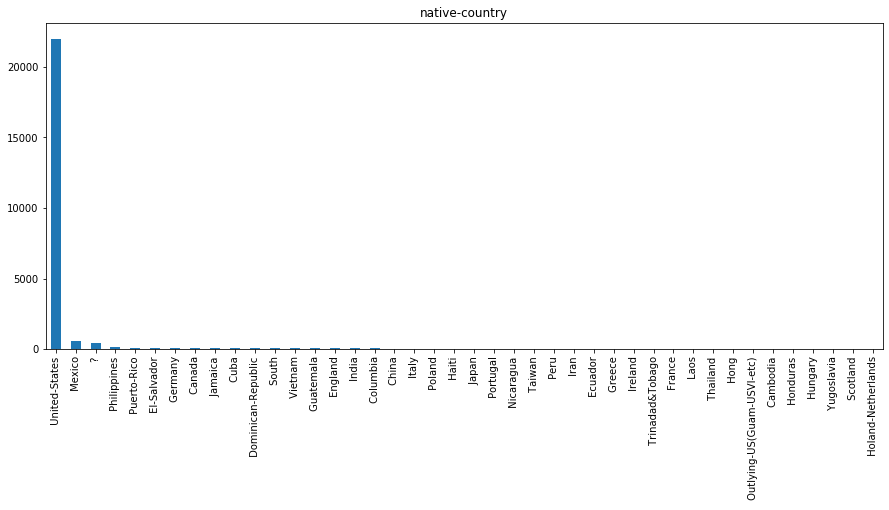

In [50]:
print('Data distribution analysis for income less than 50')
for v in variables:
    data2 = data_less_50.sort_values(by=[v])
    data2[v].value_counts().plot(kind = 'bar', figsize = (15,6))
    plt.title(v)
    plt.show()

Data distribution analysis for income greater than equal to 50


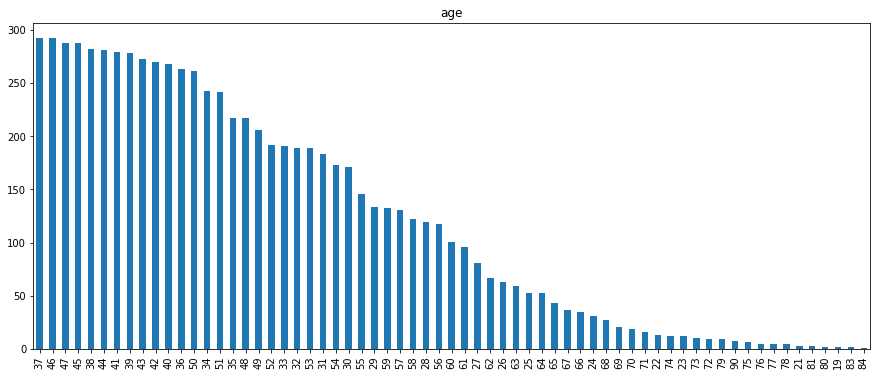

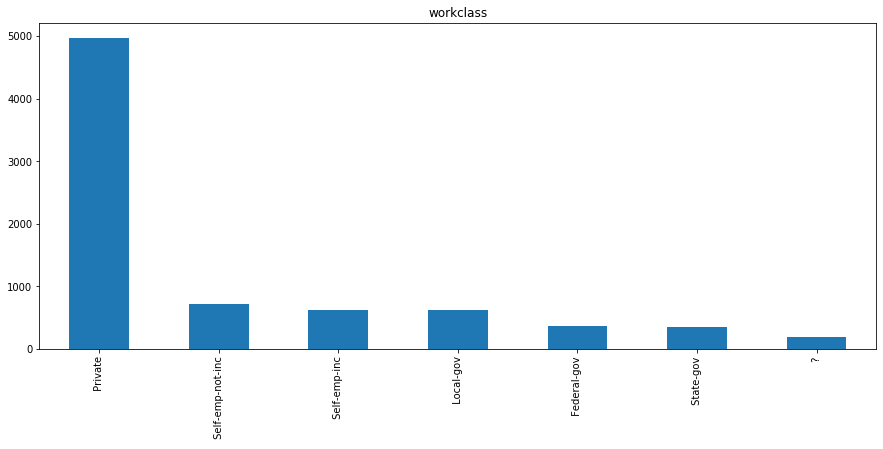

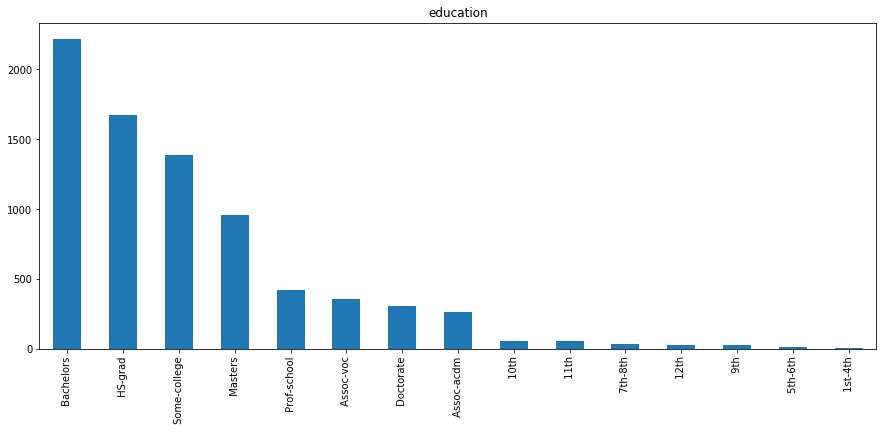

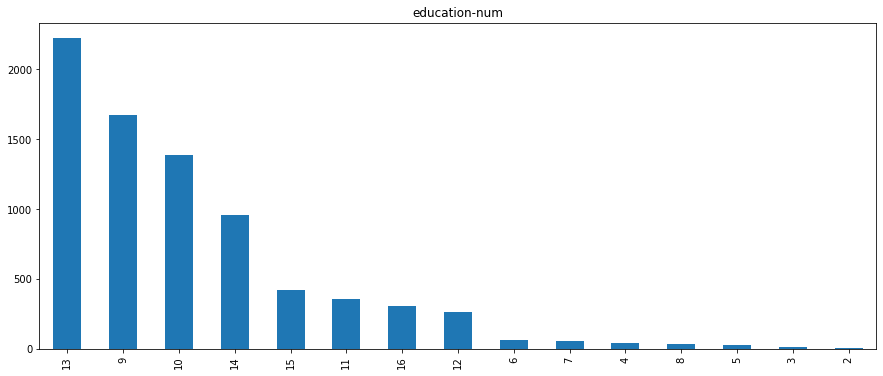

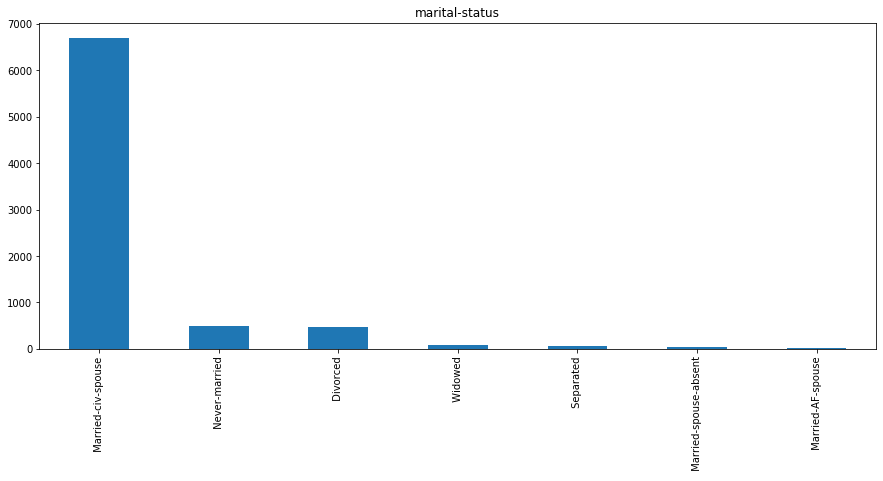

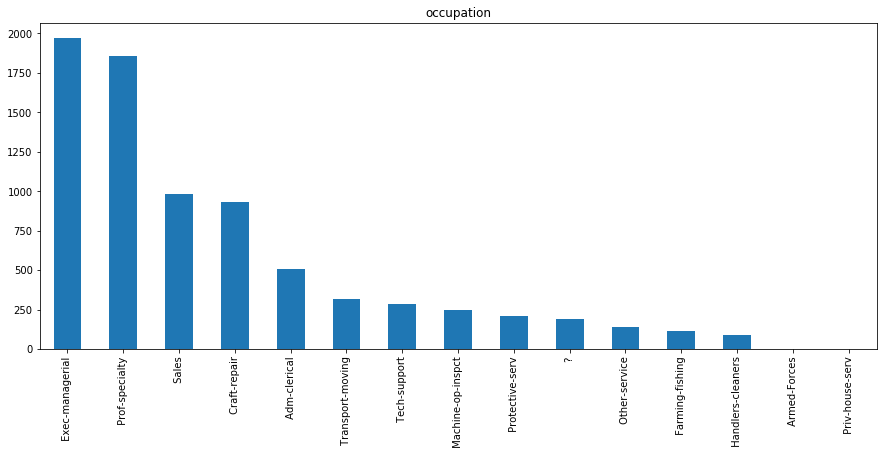

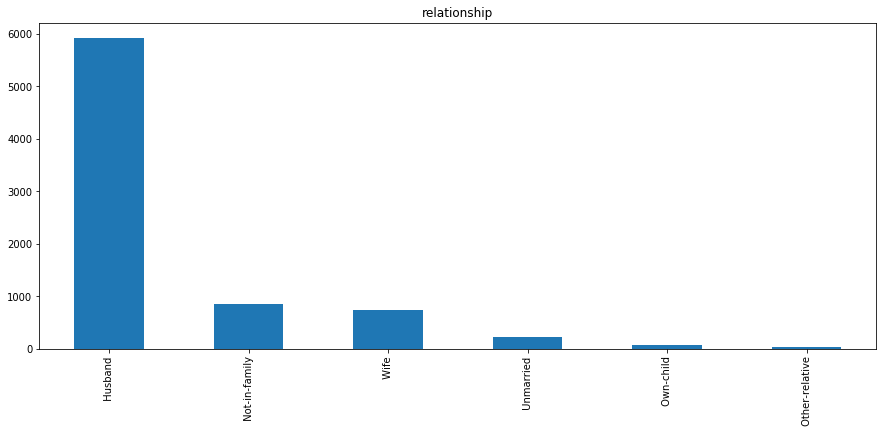

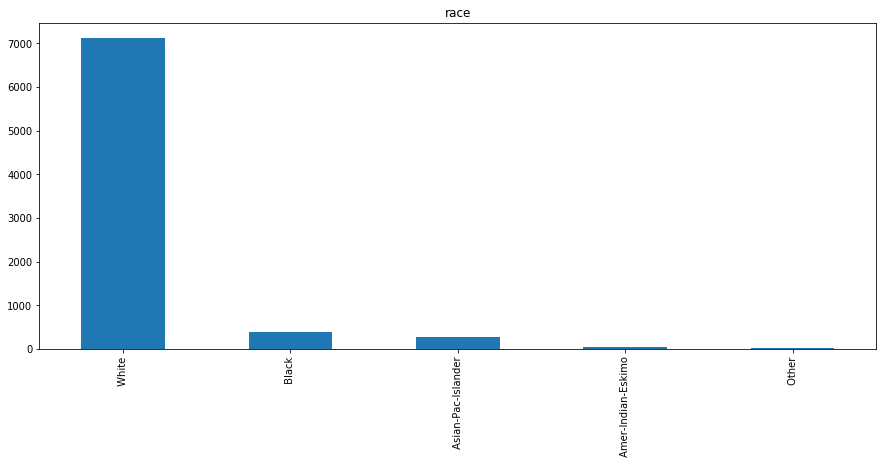

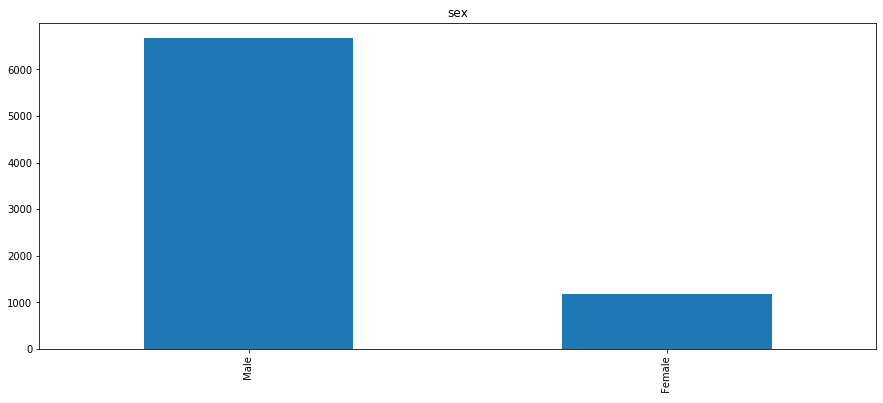

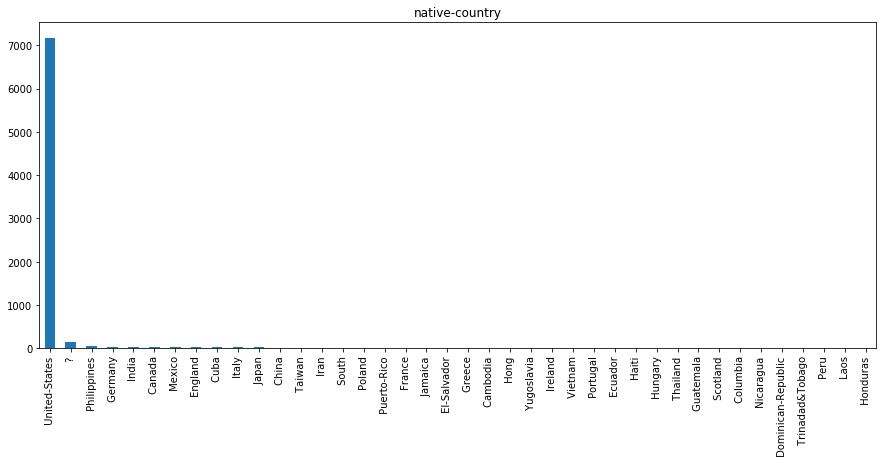

In [52]:
print('Data distribution analysis for income greater than equal to 50')
for v in variables:
    data3 = data_greater_50.sort_values(by=[v])
    data3[v].value_counts().plot(kind = 'bar', figsize = (15,6))
    plt.title(v)
    plt.show()

In [58]:
data[data['age'] < 35].count()

age               14049
workclass         14049
fnlwgt            14049
education         14049
education-num     14049
marital-status    14049
occupation        14049
relationship      14049
race              14049
sex               14049
capital-gain      14049
capital-loss      14049
hours-per-week    14049
native-country    14049
income            14049
dtype: int64

In [56]:
data.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

In [ ]:
data['income'].value_counts()